# Reproduce R. H. Blackmore, et. al, Dalton Trans., 2020,49, 232-240 

This notebook demonstrates reproducing the XAS results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 

R. H. Blackmore, M. E. Rivas, T. Eralp Erden, T. Dung Tran, H. R. Marchbank, D. Ozkaya, M. Briceno de Gutierrez, A. Wagland, P. Collier, P. P. Wells (2018). **Understanding the mechanochemical synthesis of the perovskite LaMnO3 and its catalytic behaviour ** DOI: [10.1039/C9DT03590G](http://dx.doi.org/10.1039/C9DT03590G).

- **Corresponding authors**:  P. P. Wells
- **E-mails**: 

The data used for reproducing the results was published in the University of Southampton Institutional Repository [doi:10.5258/SOTON/D1128](http://dx.doi.org/10.5258/SOTON/D1128)

For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)

## Reproducing XAS analysis

The XAS results of the paper are in Figures: [2](https://pubs.rsc.org/image/article/2020/dt/c9dt03590g/c9dt03590g-f2_hi-res.gif), [3](https://pubs.rsc.org/image/article/2020/dt/c9dt03590g/c9dt03590g-f3_hi-res.gif), [4](https://pubs.rsc.org/image/article/2020/dt/c9dt03590g/c9dt03590g-f4_hi-res.gif), [5](https://pubs.rsc.org/image/article/2020/dt/c9dt03590g/c9dt03590g-f5_hi-res.gif), 
The captions and metadata for each figure can be used for reproducing the results presented.

#### Figures and Captions
>Fig. 2 XANES spectra at the (A) Mn K-edge for LaMnO3 prepared by sol–gel synthesis and ball milling after 1 and 4 hours compared to Mn2O3 precursor
with highlighted pre-edge region and (B) La L3-edge for LaMnO3 prepared by sol–gel synthesis and ball milling after 1 and 4 hours compared
to La(OH)3 precursor.
>
>Fig. 3 Non phase-corrected Fourier transform at the Mn K-edge for
LaMnO3 synthesised by sol–gel and by ball milling from 1 h and 4 h
compared to precursor Mn2O3.
>
>Fig. 4 Mn K-edge EXAFS data after (A) time 0 h of milling (Mn2O3) and after time (B) 1 h of milling (C) 4 h of milling compared to (D) sol–gel synthesized
LaMnO3 showing the magnitude and imaginary components of the k2-weighted Fourier transform data and simulated fits.
>
>Fig. 5 Non phase-corrected Fourier transform at the La L3-edge for
LaMnO3 synthesised by sol–gel and by ball milling from 1 h to 4 h compared
to the precursor La(OH)3.

#### Metadata (ReadMe_File2.txt)
>Figure 2-5:XAS data at both the (A) Mn K-edge and (B) La L3-edge for LaMnO3 prepared by sol-gel synthesis and at 1 h time slices during ball milling compared to either Mn2O3 or La(OH)3 precursor.
>
>This is in .prj file format to be opened in Arthena and Artemis software package.

In [1]:
# Library with the functions that replicate athena:
# normalisation, merging, re-binning, 
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 

# custom plotting functions
import paper03_plots as c_plot3 # paper 3 has some similar plots

In [2]:
import numpy as np
from larch.xafs import xftf

def get_groups(data_file, data_mappings):
    data_prj = athenamgr.read_project(data_file)
    data_groups = {}
    for a_mapping in data_mappings:
        data_groups[a_mapping] = athenamgr.calc_with_defaults(athenamgr.get_group(data_prj, data_mappings[a_mapping]))
        data_groups[a_mapping].filename =  a_mapping
    return data_groups

def forward_ft(a_group, ft_vals):
    # perform a forward XAFS Fourier transform, from chi(k) to chi(R), using common XAFS conventions.
    xftf(a_group.k, a_group.chi,
         kmin=ft_vals['kmin'], kmax=ft_vals['kmax'], window=ft_vals['window'], 
         kweight = ft_vals['kweight'], rmin=ft_vals['rmin'],
         rmax=ft_vals['rmax'],dk=ft_vals['dk'], 
         group=a_group)

# plot magnitude of chi(R)
def plot_chir_magnitude(athena_groups = {}, include_groups = [], 
                        offset = 0.5, aspect = (6,8), 
                        legend_x = 7140, xlim=[], kweight=1):
    # plot using the xas data for Fe    
    plt.figure(figsize=aspect)
    for g_indx ,a_group in enumerate(include_groups):
        # get index of energy value closer to where the label shoud be placed
        idx = np.abs(athena_groups[a_group].r - legend_x).argmin()
        plt.plot(athena_groups[a_group].r, athena_groups[a_group].chir_mag - (g_indx*offset),
                color=include_groups[a_group][0])
        plt.text(athena_groups[a_group].r[idx], 
                 athena_groups[a_group].chir_mag[idx] - (g_indx*offset)+1.0, 
                 athena_groups[a_group].filename)
    plt.ylabel("$|\chi(R)| (\mathrm{\AA}^{-"+str(kweight+1)+"})$")
    plt.xlabel("$R(\mathrm{\AA})$")
    plt.xlim(xlim)
    frame1 = plt.gca()
    frame1.axes.yaxis.set_ticklabels([])
    return plt

In [3]:
la_l3_file = "C:/harwell/PSDI_test/wf_data/pub_582/DS0265/Figure 2-5_ La_L3_edge_LMOA_time_series.prj" # fresh catalyst (2a)
mn_k_file = "C:/harwell/PSDI_test/wf_data/pub_582/DS0265/Figure 2-5_ Mn_K_edge_LMOA_time_series.prj" # CO oxidation without H2 (2b)

la_l3_mappings = {"La Sol-gel": 'La_sol_gel',
                 "0 h": 'La_Time_0h',
                 "1 h": 'La_Time_1h',
                 "2 h": 'La_Time_2h',
                 "3 h": 'La_Time_3h',
                 "4 h": 'La_Time_4h',
                 "La(OH)3": 'La_OH_3',}

mn_k_mappings = {"LaMnO3 Sol-gel": 'Mn_Sol_gel',
                 "0 h": 'Mn_Time_0h',
                 "1 h": 'Mn_Time_1h',
                 "2 h": 'Mn_Time_2h',
                 "3 h": 'Mn_Time_3h',
                 "4 h": 'Mn_Time_4h',
                 "Mn2O3": 'Mn2O3',}

la_l3_groups = get_groups(la_l3_file,la_l3_mappings)
mn_k_groups = get_groups(mn_k_file,mn_k_mappings)

 do not know what to do with key 'LCF' at ''


### Reproduce 2A XANES spectra Mn K

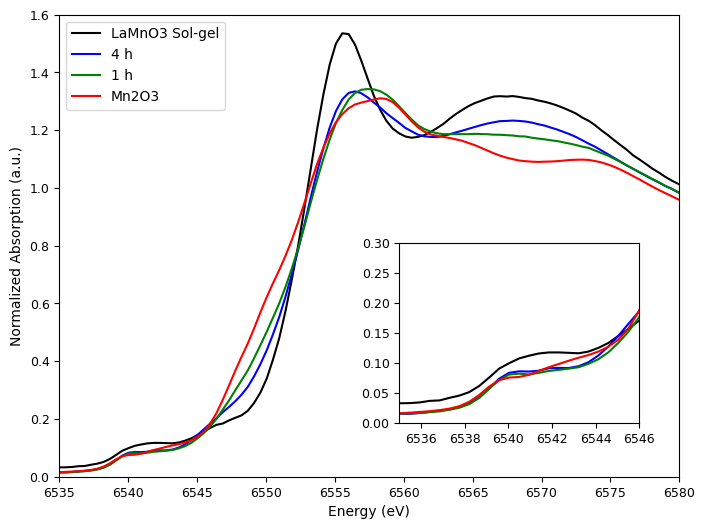

In [4]:
plot_groups = {"LaMnO3 Sol-gel":["black", "solid"], "4 h":["b", "solid"], 
               "1 h":['g', "solid"], "Mn2O3":["r", "solid"]}

plt = c_plot3.plot_normal_w_inset(mn_k_groups, plot_groups, (8,6),[6535, 6580],[0,1.6], [6535, 6546], [0.0,0.3])
plt.show()

### Reproduce 2B XANES spectra La L3

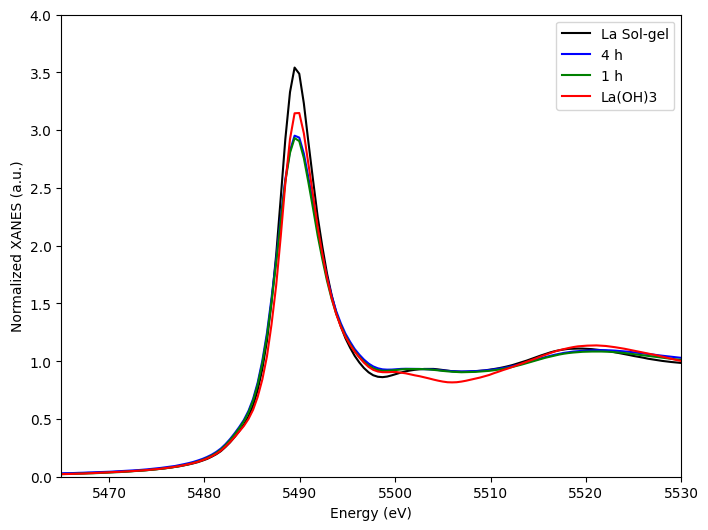

In [6]:
plot_groups = {"La Sol-gel":["black", "solid"], "4 h":["b", "solid"], 
               "1 h":['g', "solid"], "La(OH)3":["r", "solid"]}

plt = c_plot3.plot_normalised(la_l3_groups, plot_groups, (8,6),[5465, 5530],[0,4])
plt.show()

### Reproduce Figure 3 FT

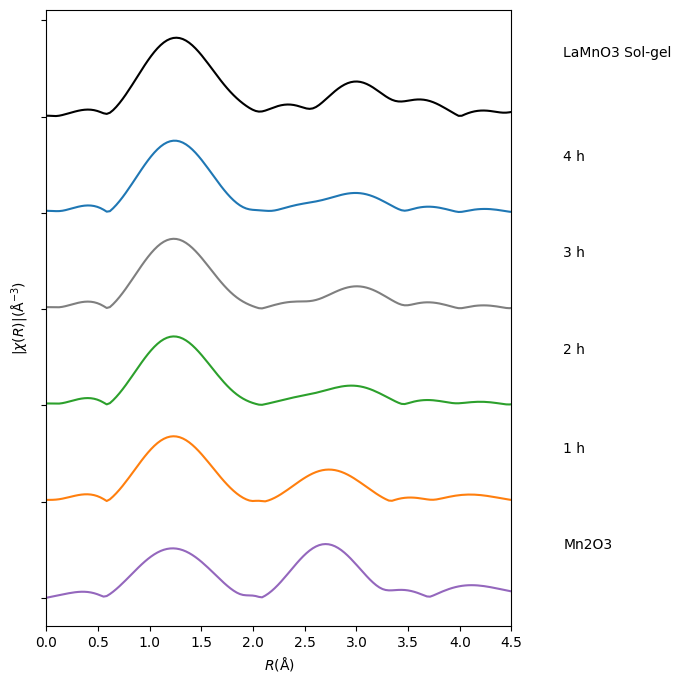

In [25]:
ft_vs  =  {'kmin':3, 
           'kmax':9, 
           'window':'hanning', 
           'kweight':2, 
           'rmin':1,
           'rmax':3, 
           'dk':1}

for a_group in mn_k_groups:
    forward_ft(mn_k_groups[a_group],ft_vs)

plot_groups = {'LaMnO3 Sol-gel':["black","solid"], '4 h':["tab:blue","solid"], 
               '3 h':["tab:grey","solid"], '2 h':["tab:green","solid"], 
               '1 h':["tab:orange","solid"], 'Mn2O3':["tab:purple","solid"]}
v_offset = 2
plot_dimensions = (6,8)
line_label_x = 5.0
radius_range = [0, 4.5]

plt = plot_chir_magnitude(athena_groups = mn_k_groups, include_groups = plot_groups, 
                          offset = v_offset, aspect = plot_dimensions, 
                          legend_x = line_label_x, xlim=radius_range, kweight=ft_vs['kweight'])
plt.show()

### Reproduce Figure 5 FT

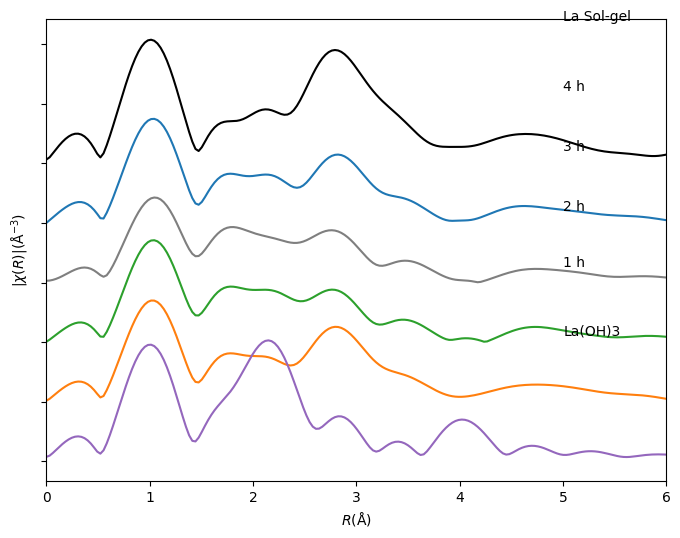

In [24]:
ft_vs  =  {'kmin':3, 
           'kmax':9, 
           'window':'hanning', 
           'kweight':2, 
           'rmin':1,
           'rmax':3, 
           'dk':1}

for a_group in la_l3_groups:
    forward_ft(la_l3_groups[a_group],ft_vs)

plot_groups = {'La Sol-gel':["black","solid"], '4 h':["tab:blue","solid"], 
               '3 h':["tab:grey","solid"], '2 h':["tab:green","solid"], 
               '1 h':["tab:orange","solid"], 'La(OH)3':["tab:purple","solid"]}
v_offset = 0.5
plot_dimensions = (8,6)
line_label_x = 5.0
radius_range = [0, 6]

plt = plot_chir_magnitude(athena_groups = la_l3_groups, include_groups = plot_groups, 
                          offset = v_offset, aspect = plot_dimensions, 
                          legend_x = line_label_x, xlim=radius_range, kweight=ft_vs['kweight'])
plt.show()

### Reproduce Fig 4 EXAFS fittings

Two crystal structures are required for fitting, in addition to the data on the projects. The crystal structures were obtained from materials project. The name of the paths to select are contained in table S2 of the [supplementary material](https://www.rsc.org/suppdata/c9/dt/c9dt03590g/c9dt03590g1.pdf).

|Plot|Group|Paths|
|:---|:----|:----|
| A|Mn-K 0 h|Mn-O1,Mn-O2,Mn-Mn1,Mn-Mn2|
| B|Mn-K 1 h|Mn-O,Mn-Mn1,Mn-Mn2|
| C|Mn-K 4 h|Mn-O,Mn-La1,Mn-La2|
| D|LaMnO3 Sol-gel| Mn-O,Mn-La1,Mn-La2|


In [37]:

crystal_files = ["C:/harwell/PSDI_test/wf_data/pub_582/additional/1667441.cif",
                 "C:/harwell/PSDI_test/wf_data/pub_582/additional/mp-565203_Mn2O3.cif",] 

gds_parms_f = "SnK_edge_gds.csv"
sel_paths_f = "SnK_edge_sp.csv"

show_graph = False # False to prevent showing graphs

# variables for fit
fit_vars = {}
fit_vars['fitspace']='r'
fit_vars['kmin']=0 
fit_vars['kmax']=10
fit_vars['kw']=2 
fit_vars['dk']=1
fit_vars['window']='hanning'
fit_vars['rmin']=0.0
fit_vars['rmax']=5.0

# Need to specify the absorbing atom and maximum radius
absorbing_atoms = ["O","O"]
max_radius = 8.0

In [38]:
# Library with the functions that execute 
# Atoms and FEFF to generate scattering paths
import lib.atoms_feff as feff_runner     

# Set parameters          
# library containign functions tho manage fit, at read, write 
# GDS parameters, and scattering paths. 
import lib.manage_fit as fit_manager  

# run feff and get a list of feff dirs
feff_dirs = feff_runner.run_feff(crystal_files, absorbing_atoms, max_radius) 

# could prevent running if the files still exist and they are recent (<month old)

 : ======== running Feff module C:\Users\scman1\AppData\Local\Programs\Python\Python39\lib\site-packages\larch\bin\win64\feff6l.exe ========
 : Feff 6L.02
 : comment: None given
 : Source:  C:\harwell\PSDI_test\wf_data\pub_582\additional\1667441.cif
 : Structure Summary:  La1 Mn1 O3
 : Reduced formula:  LaMnO3
 : space group: (Pm-3m), space number:  (221)
 : abc:  3.879541   3.879541   3.880500
 : angles: 89.992930  89.992930  90.010443
 : sites: 5
 : Calculating potentials and phases...
 : free atom potential and density for atom type    0
 : free atom potential and density for atom type    1
 : free atom potential and density for atom type    2
 : free atom potential and density for atom type    3
 : overlapped potential and density for unique potential    0
 : overlapped potential and density for unique potential    1
 : overlapped potential and density for unique potential    2
 : overlapped potential and density for unique potential    3
 : muffin tin radii and interstitial parame

 : 159     8.724    16.000     4   5.6875
 : 160    10.088     8.000     3   5.6882
 : 161     2.550     8.000     3   5.6882 neglected
 : 162     6.538    16.000     4   5.6881
 : 163     3.161     8.000     4   5.6882
 : 164    16.535     4.000     2   5.8187
 : 165    16.526     4.000     2   5.8199
 : 166     8.260     2.000     2   5.8208
 : 167     6.109     4.000     3   5.8208
 : 168    23.788     4.000     3   5.8208
 : 169    15.637     4.000     3   5.8208
 : 170    11.895     4.000     6   5.8208
 : 171     6.817     4.000     4   5.8208
 : 172     4.879     4.000     4   5.8208
 : 173     9.084     4.000     4   5.8208
 : 174     1.780     2.000     4   5.8208 neglected
 : 175     3.131     4.000     4   5.8208
 : 176    26.881     4.000     4   5.8208
 : 177    19.044     2.000     4   5.8208
 : 178    23.482     4.000     4   5.8208
 : 179     1.570     2.000     4   5.8208 neglected
 : 180     7.693     2.000     4   5.8208
 : 181     2.121     4.000     6   5.8208 negl

 : 92     2.975     2.000     4   4.5874
 : 93     1.483     1.000     4   4.5925 neglected
 : 94    14.295     2.000     3   4.5974
 : 95     7.952     2.000     3   4.6114
 : 96     2.996     2.000     4   4.6536
 : 97     2.122     2.000     4   4.6595 neglected
 : 98     3.512     1.000     4   4.6777
 : 99     4.843     2.000     4   4.6833
 : 100     4.628     2.000     4   4.6827
 : 101    14.413     1.000     2   4.6872
 : 102     5.372     1.000     4   4.6883
 : 103     6.289     2.000     4   4.7018
 : 104     3.522     1.000     4   4.7035
 : 105     4.064     2.000     3   4.7120
 : 106     4.043     2.000     3   4.7127
 : 107     4.976     2.000     4   4.7248
 : 108     4.954     2.000     4   4.7249
 : 109     2.095     2.000     4   4.7553 neglected
 : 110    13.807     1.000     2   4.7703
 : 111     7.459     2.000     3   4.7727
 : 112    13.639     2.000     3   4.7727
 : 113     2.669     2.000     4   4.7785
 : 114     3.156     2.000     4   4.7862
 : 115     4

 : 285     3.817     1.000     4   5.6905
 : 286     1.533     1.000     4   5.6933 neglected
 : 287     1.517     1.000     4   5.6933 neglected
 : 288     4.143     1.000     4   5.7009
 : 289     3.695     2.000     3   5.7022
 : 290     9.153     2.000     3   5.7042
 : 291     9.169     2.000     3   5.7042
 : 292     4.833     2.000     3   5.7072
 : 293     4.408     2.000     4   5.7151
 : 294     6.651     2.000     3   5.7166
 : 295     2.912     2.000     4   5.7213
 : 296     3.305     2.000     4   5.7254
 : 297     3.157     2.000     4   5.7254
 : 298     1.969     2.000     4   5.7327 neglected
 : 299     8.205     1.000     2   5.7358
 : 300     3.500     2.000     4   5.7356
 : 301    16.352     2.000     2   5.7440
 : 302     3.458     2.000     4   5.7430
 : 303     8.174     1.000     2   5.7444
 : 304     3.710     2.000     4   5.7517
 : 305     4.504     2.000     3   5.7519
 : 306     6.012     2.000     3   5.7519
 : 307     6.011     2.000     3   5.7519
 : 3

In [39]:
from larch import Interpreter
session = Interpreter()
# read save parameters from input gds file
gds = fit_manager.read_gds(gds_parms_f, session)
# show gsd group parameters in a spreadsheet
this_sheet = fit_manager.show_gds(gds)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms_f)

No conda env active, defaulting to base


Sheet(cells=(Cell(column_start=0, row_end=19, row_start=0, squeeze_column=False, squeeze_row=False, value=[['i…

In [40]:
path_sheet = fit_manager.show_feff_paths(crystal_files)#('FeS2.inp')
display(path_sheet)

Reading from 1667441_feff
1667441_feff path and 1667441_feff\files.dat found
Reading from: 1667441_feff\files.dat
1: comment: None given                                    Feff 6L.02  potph 4.12
2: Source:  C:\harwell\PSDI_test\wf_data\pub_582\additional\1667441.cif
3: Structure Summary:  La1 Mn1 O3
4: Reduced formula:  LaMnO3
5: space group: (Pm-3m), space number:  (221)
6: abc:  3.879541   3.879541   3.880500
7: angles: 89.992930  89.992930  90.010443
8: sites: 5
9: Abs   Z= 8 Rmt= 0.902 Rnm= 1.072 K shell
10: Pot 1 Z=57 Rmt= 1.708 Rnm= 1.827
11: Pot 2 Z=25 Rmt= 1.056 Rnm= 1.319
12: Pot 3 Z= 8 Rmt= 0.927 Rnm= 1.110
13: Gam_ch=2.172E-01 H-L exch
14: Mu=-5.921E+00 kf=2.110E+00 Vint=-2.288E+01 Rs_int= 1.719
Reading from mp-565203_Mn2O3_feff
mp-565203_Mn2O3_feff path and mp-565203_Mn2O3_feff\files.dat found
Reading from: mp-565203_Mn2O3_feff\files.dat
1: comment: None given                                    Feff 6L.02  potph 4.12
2: Source:  C:\harwell\PSDI_test\wf_data\pub_582\addition

Sheet(cells=(Cell(column_end=7, column_start=0, row_end=555, row_start=0, squeeze_column=False, squeeze_row=Fa…